# Data exploration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import re
import pandas as pd

### Load code for this project

In [2]:
import data_processing.generate_images as gi
%load_ext autoreload
%autoreload 1
%aimport data_processing.generate_images

### Investigate structure of data

In [3]:
filename = 'data_processing/data/Mg22_alphaalpha_digiSim.h5'
hf = h5py.File(filename, "r")
hf.get('/get')

In [4]:
event_i = 0
event = hf["Event_[{}]".format(event_i)][:]
display(pd.DataFrame(event))

,x,y,z,t,A,trackID
0,-2.454130,1.450752,834.0,417,6733.605773,0
1,-0.000013,2.799905,834.0,417,12585.463255,0
2,-2.454130,-1.450752,834.0,417,1705.208085,0
3,2.454133,-1.450752,900.0,450,3778.845219,0
4,-0.000013,-2.799905,900.0,450,11368.678344,0
5,2.454133,1.450752,962.0,481,3210.764796,0
6,4.908251,-5.701409,964.0,482,44.570651,0
7,2.454104,7.050561,966.0,483,21.112801,0
8,-2.454131,-7.050561,984.0,492,19.055387,0
9,-4.908247,5.701409,986.0,493,19.747327,0


### Length of events

In [5]:
length = []
for key in hf.keys():
    length.append(len(hf[key]))
length = np.asarray(length)

In [6]:
plt.figure()
plt.hist(length, bins=100)
plt.xlabel("Length (items)")
plt.show()

/home/anton/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


## Visualisation

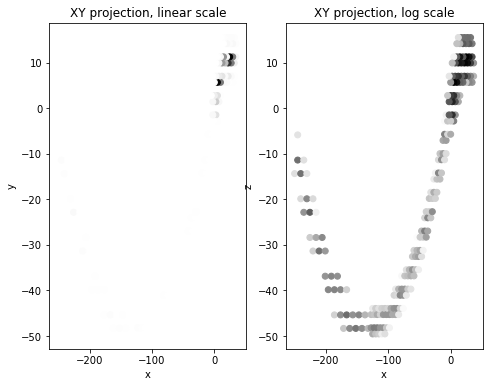

In [7]:
%matplotlib inline

event_i = 1

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(131)
sc = plt.scatter(gi.get_event_by_index(hf, event_i)["x"], gi.get_event_by_index(hf, event_i)["y"], c=gi.get_event_by_index(hf, event_i)["A"], cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("XY projection, linear scale")

ax = plt.subplot(132)
sc = plt.scatter(gi.get_event_by_index(hf, event_i)["x"], gi.get_event_by_index(hf, event_i)["y"], c=np.log(gi.get_event_by_index(hf, event_i)["A"]), cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.set_title("XY projection, log scale")

#cbar = fig.colorbar(sc, orientation='vertical', label='A')    

plt.show()

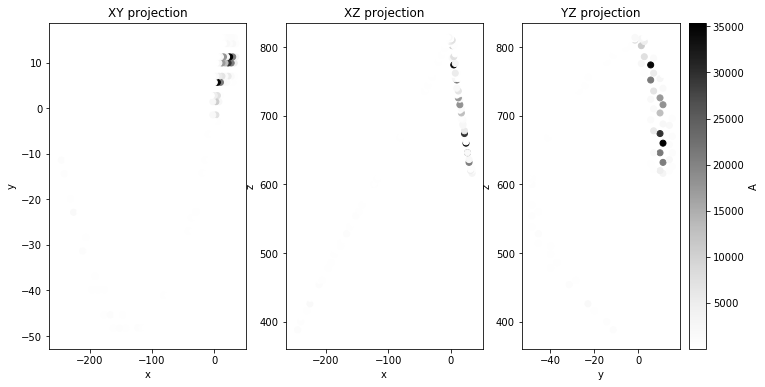

In [8]:
%matplotlib inline

event_i = 1

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(131)
sc = plt.scatter(gi.get_event_by_index(hf, event_i)["x"], gi.get_event_by_index(hf, event_i)["y"], c=gi.get_event_by_index(hf, event_i)["A"], cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("XY projection")

ax = plt.subplot(132)
sc = plt.scatter(gi.get_event_by_index(hf, event_i)["x"], gi.get_event_by_index(hf, event_i)["z"], c=gi.get_event_by_index(hf, event_i)["A"], cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.set_title("XZ projection")

ax = plt.subplot(133)
sc = plt.scatter(gi.get_event_by_index(hf, event_i)["y"], gi.get_event_by_index(hf, event_i)["z"], c=gi.get_event_by_index(hf, event_i)["A"], cmap='Greys')
ax.set_xlabel("y")
ax.set_ylabel("z")
ax.set_title("YZ projection")

cbar = fig.colorbar(sc, orientation='vertical', label='A')    

plt.show()

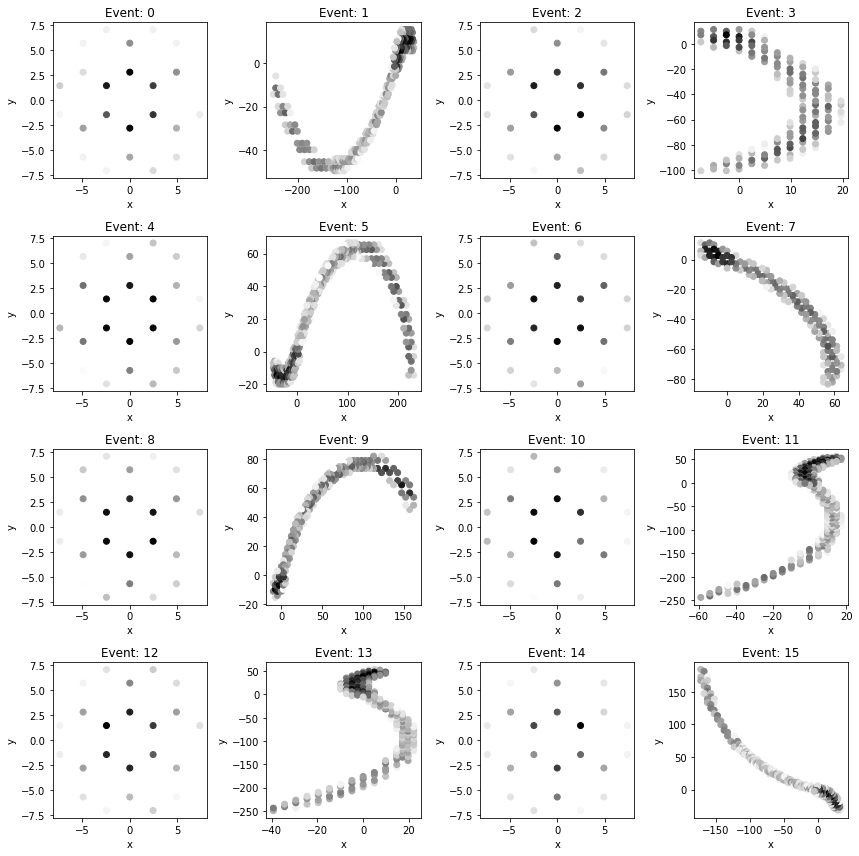

In [9]:
n_rows, n_cols = 4, 4

fig = plt.figure(figsize=(12,12))

for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i+1)
    sc = plt.scatter(gi.get_event_by_index(hf, i)["x"], gi.get_event_by_index(hf, i)["y"], c=np.log(gi.get_event_by_index(hf, i)["A"]), cmap='Greys')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Event: {}".format(i))
    #plt.xlim(-275.0, 275.0)
    #plt.ylim((-275.0, 275.0))
    #ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

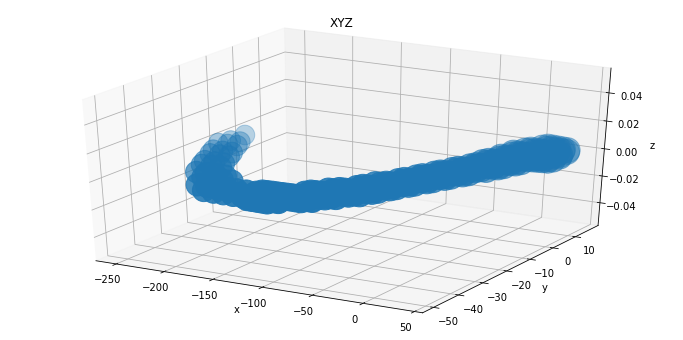

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
sc = plt.scatter(gi.get_event_by_index(hf, event_i)["x"], gi.get_event_by_index(hf, event_i)["y"], gi.get_event_by_index(hf, event_i)["z"])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("XYZ")
plt.show()

## Read and label data - to dictionary

* Even events: beam -> label = 0
* Odd events: beam -> label = 1

In [21]:
dict_data = gi.read_and_label_data("data_processing/data/")

Processing data...
WARNING, Event_[1204] has no pads firing. Removing event ...
WARNING, Event_[384] has no pads firing. Removing event ...
WARNING, Event_[430] has no pads firing. Removing event ...
WARNING, Event_[484] has no pads firing. Removing event ...
WARNING, Event_[914] has no pads firing. Removing event ...
	Done


## Discretization

From raw event to discretized image via transformation and normalization

In [22]:
event_i = 1

In [23]:
data = [list(dict_data[event_i])] #from dict to list (important to use 'list' as it copies the data!)

print("Shape:\n\tdata:", len(data))
data, max_charge = gi.transform_normalize_data(data)

features, targets = gi.make_image_features_targets(data, 'xy', 48)

Shape:
	data: 1
Transform, shuffle and normalize data ...
Make image features and targets ...


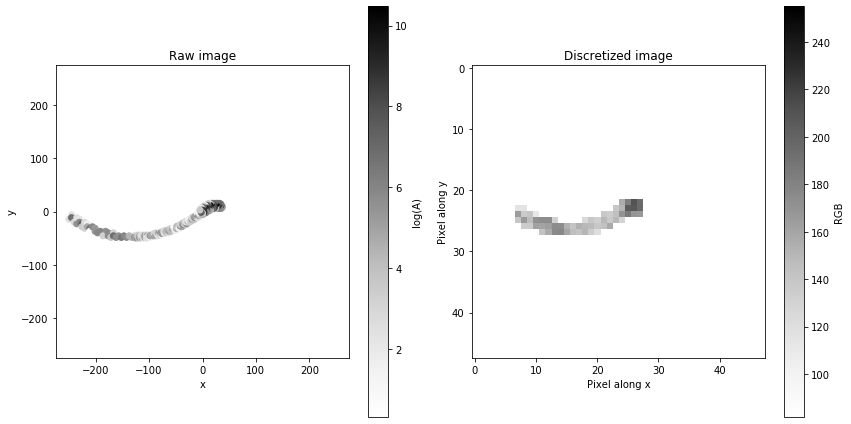

In [24]:
%matplotlib inline
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1,2,1)
sc = plt.scatter(gi.get_event_by_index(hf, event_i)["x"], gi.get_event_by_index(hf, event_i)["y"], c=np.log(gi.get_event_by_index(hf, event_i)["A"]), cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Raw image")
plt.xlim(-275.0, 275.0)
plt.ylim((-275.0, 275.0))
cbar = fig.colorbar(sc, orientation='vertical', label='log(A)')
ax.set_aspect('equal', adjustable='box')

ax = fig.add_subplot(1,2,2)
im = ax.imshow(features[0], cmap='Greys')
ax.set_xlabel("Pixel along x")
ax.set_ylabel("Pixel along y")
ax.set_title("Discretized image")
plt.colorbar(im, ax=ax, label="RGB")

plt.tight_layout()
plt.show()